In [29]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [45]:
train_data  = pd.read_csv("titanicTrain.csv")
test_data   = pd.read_csv("titanicQuestion.csv")

In [46]:
train_data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [14]:
test_data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3,NaN,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.75,NaN,Q,NaN,NaN,NaN
1,3,NaN,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.25,NaN,Q,16,NaN,NaN
2,3,NaN,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.25,NaN,Q,16,NaN,NaN


Features
survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat - Lifeboat (if survived)
body - Body number (if did not survive and body was recovered)

https://github.com/awesomedata/awesome-public-datasets/issues/351
https://data.world/nrippner/titanic-disaster-dataset


In [6]:
training_df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [13]:
sex_group = train_data[['sex', 'survived']].groupby('sex')

sex_agg = sex_group.agg(['sum', 'count'])['survived']

sex_agg['rate'] = sex_agg.apply(lambda row: row['sum'] / row['count'], axis=1)
sex_agg

,sum,count,rate
sex,,,
female,290.0,371,0.781671
male,133.0,629,0.211447


In [66]:
nans = {}
for colname in train_data.columns:
    nans[colname] = train_data[train_data[colname].isnull()].size
nans

{'age': 0,
 'boat': 7305,
 'body': 11505,
 'cabin': 8985,
 'embarked': 30,
 'fare': 0,
 'home.dest': 2685,
 'name': 0,
 'one': 0,
 'parch': 0,
 'pclass': 0,
 'sex': 0,
 'sibsp': 0,
 'survived': 0,
 'ticket': 0}

In [ ]:
train_data['one'] = 1
train_data = train_data[train_data['age'].notnull()]

In [58]:
train_survive = train_data[train_data.survived == 1]
train_dead = train_data[train_data.survived == 0]

In [60]:

age_survive_group = train_survive.groupby(by='age')['one'].sum()
age_dead_group = train_dead.groupby(by='age')['one'].sum()



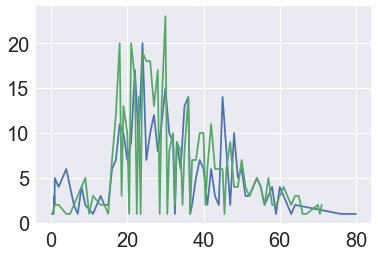

In [63]:
%matplotlib inline 
plt.plot(age_survive_group)


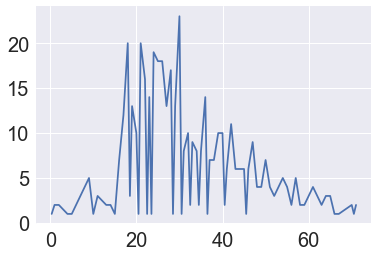

In [64]:
plt.plot(age_dead_group)

In [73]:
train_survive['boat'].count()

368

ValueError: could not convert string to float: 'D'

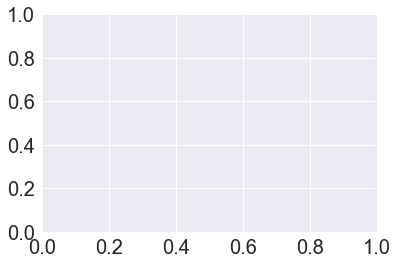

In [67]:
train_survive= train_survive[train_survive['age'].notnull()]
train_dead = train_dead[train_dead['age'].notnull()]

boat_survive_group = train_survive.groupby(by='boat')['one'].sum()
boat_dead_group = train_dead.groupby(by='boat')['one'].sum()

%matplotlib inline 
plt.plot(boat_survive_group)
plt.plot(boat_dead_group)

In [17]:
def plot_kde(fig, ncols, nrows, mypos, title, feature, xmin=0, xmax=None):
    
    ax = fig.add_subplot(ncols, nrows, mypos)
    train_survive[feature].plot.kde(ax=ax, color='g')
    train_dead[feature].plot.kde(ax=ax, color='r')
    ax.set_title(title)
    ax.set_xlim(xmin, xmax)

In [27]:
fig = plt.figure(figsize=(12, 10))

plot_kde(fig, 2, 1, 1, 'age', 'age', xmax=train_data.age.max())
plot_kde(fig, 2, 2, 3, 'fare', 'fare', xmax=train_data.fare.max())
plot_kde(fig, 2, 2, 4, 'fare (<100)', 'fare', xmax=99)


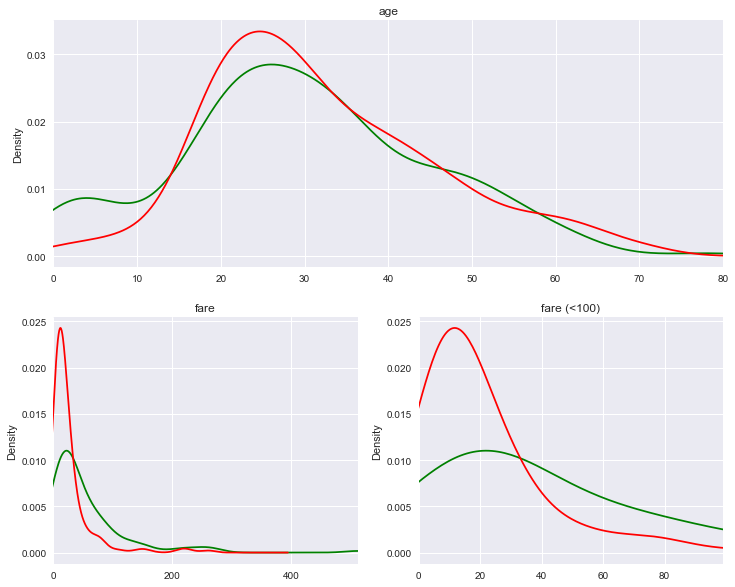

In [30]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.show()